# «Корреляция и корреляционный анализ»

## 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков


## 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [40]:
water = pd.read_csv('water.csv')
water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


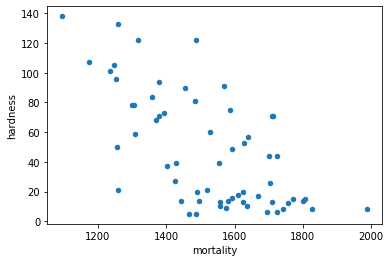

In [41]:
water.plot(kind='scatter', x='mortality', y='hardness')

In [42]:
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [43]:
water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [44]:
water[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [45]:
x = water[['mortality']]
y = water['hardness']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [47]:
X_train.shape

(42, 1)

In [48]:
y_train.shape

(42,)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
model.coef_

array([-0.12583698])

In [51]:
model.intercept_

236.7523129838345

In [52]:
y_pred = model.predict(X_test)
y_pred

array([64.4814935 , 37.8040547 , 73.29008179, 61.58724307, 36.54568494,
       32.01555382, 70.89917926, 23.33280251, 78.95274569, 39.3140984 ,
       17.54430164, 21.19357393, 22.57778066, 30.75718407, 15.90842096,
       57.05711195, 34.28061938, 38.68491352, 63.22312375])

In [53]:
model.score(X_test, y_test)

0.4521380323107576

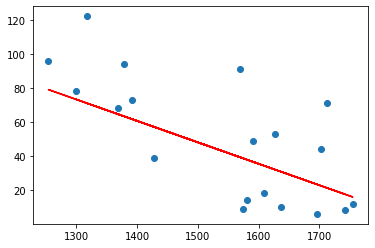

In [54]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [59]:
X_const = sm.add_constant(X_train)

In [66]:
model = sm.OLS(y_train, X_const)
results = model.fit()

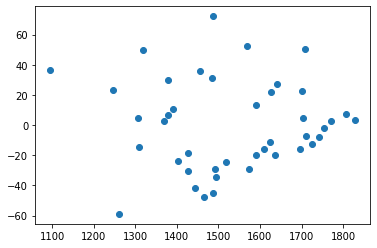

In [68]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([2., 3., 7., 8., 6., 4., 6., 2., 3., 1.]),
 array([-58.84686422, -45.75047813, -32.65409205, -19.55770596,
         -6.46131987,   6.63506621,  19.7314523 ,  32.82783838,
         45.92422447,  59.02061056,  72.11699664]),
 <a list of 10 Patch objects>)

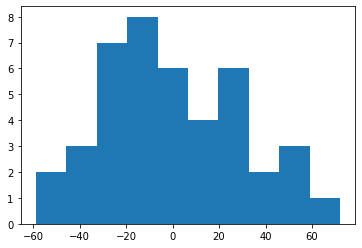

In [69]:
plt.hist(results.resid)

## South

In [70]:
south = water.loc[water['location'] == 'South']

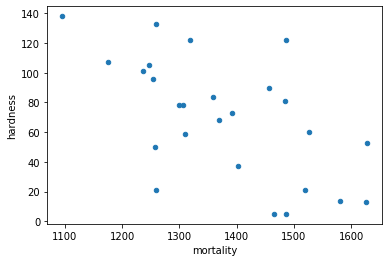

In [71]:
south.plot(kind='scatter', x='mortality', y='hardness')

In [72]:
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [73]:
south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [74]:
south[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [75]:
x = south[['mortality']]
y = south['hardness']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
model.coef_

array([-0.16212091])

In [77]:
model.intercept_

291.0071673400697

In [78]:
y_pred = model.predict(X_test)
y_pred

array([ 70.68484969, 100.51509726,  44.74550398,  50.25761494,
        86.89694076,  63.71365053,  34.69400751,  27.23644562])

In [79]:
model.score(X_test, y_test)

0.5457030490410346

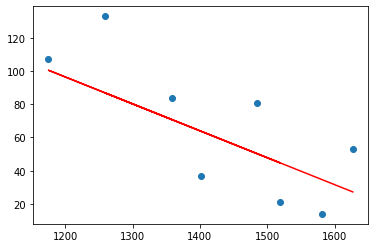

In [80]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [81]:
X_const = sm.add_constant(X_train)

In [82]:
model = sm.OLS(y_train, X_const)
results = model.fit()

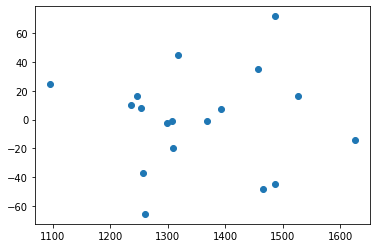

In [83]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 2., 1., 2., 3., 5., 1., 1., 1., 1.]),
 array([-65.73481985, -51.97088727, -38.20695469, -24.4430221 ,
        -10.67908952,   3.08484306,  16.84877564,  30.61270822,
         44.37664081,  58.14057339,  71.90450597]),
 <a list of 10 Patch objects>)

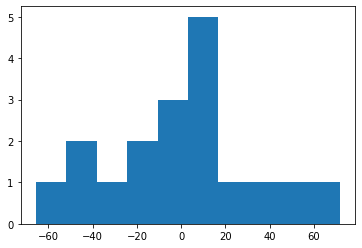

In [84]:
plt.hist(results.resid)

## North

In [85]:
north = water.loc[water['location'] == 'North']

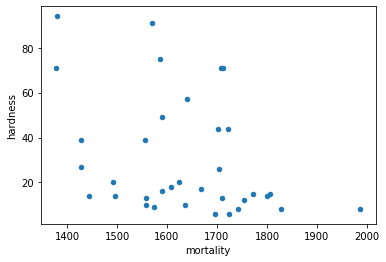

In [86]:
north.plot(kind='scatter', x='mortality', y='hardness')

In [87]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [88]:
north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [89]:
north[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [90]:
x = north[['mortality']]
y = north['hardness']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
model.coef_

array([-0.09797251])

In [92]:
model.intercept_

188.8197733182848

In [93]:
y_pred = model.predict(X_test)
y_pred

array([28.43877288, 20.99286205, 21.18880707, 31.18200319, 42.74275948,
       -5.85160596, 34.61104107, 35.10090362, 21.38475209, 42.35086943,
       21.87461464])

In [94]:
model.score(X_test, y_test)

-0.18323661306115335

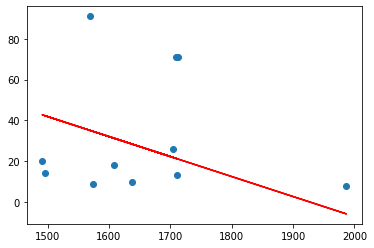

In [95]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [96]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()

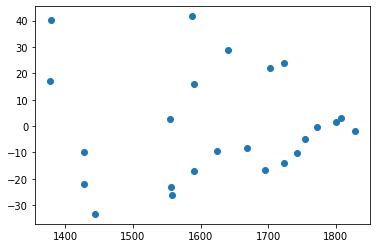

In [97]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([2., 2., 3., 5., 5., 0., 2., 2., 1., 2.]),
 array([-33.34746749, -25.84646059, -18.34545368, -10.84444677,
         -3.34343987,   4.15756704,  11.65857395,  19.15958085,
         26.66058776,  34.16159467,  41.66260157]),
 <a list of 10 Patch objects>)

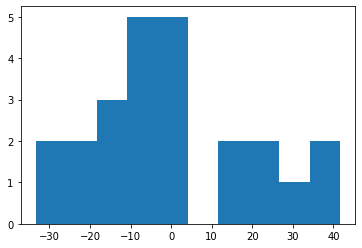

In [98]:
plt.hist(results.resid)

# Выводы

- Есть средняя отрицательная корреляция между жесткостью воды и средней годовой смертностью

- В южных городах зависимость сохраняется, в северных - корреляция слабая